# DASK

- The Python library for parallel computing
- Open Source Library developed in coordination with other libraries such as Numpy, Pandas or Scikit-Learn

## 1. NUMPY

Dask arrays scale Numpy workflows, which enables multi-dimensional data analysis, e.g. for machine learning algorithms

- Dask Array implements a subset of the NumPy ndarray interface using blocked algorithms, cutting up the large array into many small arrays
--> This allows to compute arrays larger than memory using all of the cores
--> Dask graphs coordinate these blocked algorithms

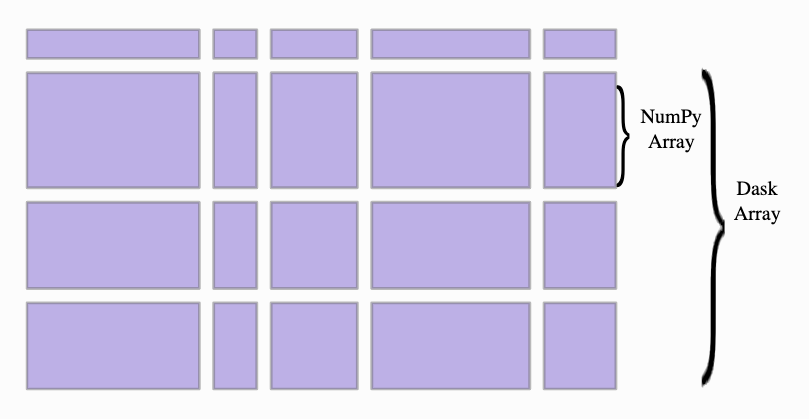

In [1]:
# Numpy
import numpy as np

x = np.ones(15)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2]:
# Dask
import dask.array as da

x = da.ones(15, chunks=(5,))
x

dask.array<ones, shape=(15,), dtype=float64, chunksize=(5,), chunktype=numpy.ndarray>

In [3]:
x.sum() # does not work with dask - lazy by default

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

In [4]:
x.sum().compute()

15.0

### Larger Arrays

In [5]:
x = da.ones((10000, 10000), chunks=(1000, 1000))
x
#Result: 10 by 10 grid with a 1000 by a 1000 Numpy Arrays

dask.array<ones, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

- Operations are pretty similar to Numpy

In [6]:
y = x + x.T #add it to its transpose
z = y[::2, :].mean(axis=1) #slice it and take the mean
z

dask.array<mean_agg-aggregate, shape=(5000,), dtype=float64, chunksize=(500,), chunktype=numpy.ndarray>

In [7]:
z.compute() #computes in parallel

array([2., 2., 2., ..., 2., 2., 2.])

In [8]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))
x

dask.array<random_sample, shape=(10000, 10000), dtype=float64, chunksize=(1000, 1000), chunktype=numpy.ndarray>

In [9]:
x.compute()

array([[0.5947175 , 0.04595718, 0.73057142, ..., 0.00731763, 0.67277456,
        0.10263569],
       [0.42095779, 0.09387385, 0.29382582, ..., 0.72047009, 0.74871431,
        0.5633237 ],
       [0.58426644, 0.06185292, 0.49081536, ..., 0.54690283, 0.84407552,
        0.01430837],
       ...,
       [0.49212236, 0.00474975, 0.12446222, ..., 0.86226232, 0.15341302,
        0.59512929],
       [0.69021165, 0.97596073, 0.10278637, ..., 0.61483412, 0.8790014 ,
        0.92885315],
       [0.07472892, 0.9829028 , 0.81240558, ..., 0.76930707, 0.09926515,
        0.98181812]])

#### Example 2

In [ ]:
# DO NOT RUN #
### Kernel will die, because this is too huge for Numpy ###
import numpy as np

images = np.ones((10000, 1000, 1000))
images

In [10]:
import dask.array as da

images1 = da.ones((10000, 1000, 1000))
images1

,Array,Chunk
Bytes,80.00 GB,125.00 MB
Shape,"(10000, 1000, 1000)","(250, 250, 250)"
Count,640 Tasks,640 Chunks
Type,float64,numpy.ndarray


##### Documentation: https://docs.dask.org/en/latest/array.html

### 2. PANDAS

Dask dataframes scale Pandas workflows, which enables applications in time series, business intelligence or in general with larger chunks of data

- A Dask DataFrame is a large parallel DataFrame composed of many smaller Pandas DataFrames
- It is partitioned row-wise by index value
- These Pandas objects do not have to be in Memory - they can be on disk or on other machines

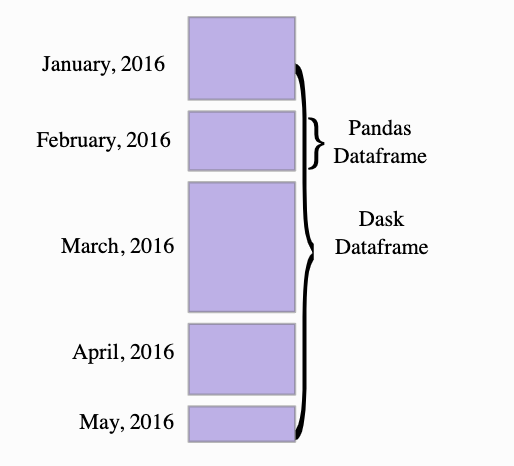

In [11]:
import pandas as pd

df = pd.read_csv("data/NDX-2020-11-17.csv", parse_dates = ["Date"])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,11732.339844,11778.110352,11454.570313,11478.879883,11478.879883,3455430000
1,2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,11516.490234,3483200000
2,2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,11484.690430,3445520000
3,2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,11506.009766,3414590000
4,2020-10-23,11536.009766,11548.849609,11434.860352,11548.280273,11548.280273,3134240000
5,2020-10-26,11440.639648,11545.629883,11221.059570,11358.940430,11358.940430,3186950000
6,2020-10-27,11409.339844,11465.059570,11361.860352,11431.349609,11431.349609,3079530000
7,2020-10-28,11230.900391,11249.950195,10999.070313,11004.870117,11004.870117,3912580000
8,2020-10-29,11064.469727,11287.629883,11030.190430,11185.589844,11185.589844,3222460000
9,2020-10-30,11103.469727,11129.809570,10822.570313,10911.589844,10911.589844,3662840000


In [12]:
df.Volume.mean()

3713006190.4761906

In [13]:
import dask.dataframe as dd

df1 = dd.read_csv("data/NDX-2020-11-17.csv", parse_dates = ["Date"])
df1

,Date,Open,High,Low,Close,Adj Close,Volume
npartitions=1,,,,,,,
,datetime64[ns],float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...


In [14]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,11732.339844,11778.110352,11454.570313,11478.879883,11478.879883,3455430000
1,2020-10-20,11531.830078,11632.889648,11471.230469,11516.490234,11516.490234,3483200000
2,2020-10-21,11530.389648,11613.790039,11476.080078,11484.690430,11484.690430,3445520000
3,2020-10-22,11526.969727,11548.769531,11369.290039,11506.009766,11506.009766,3414590000
4,2020-10-23,11536.009766,11548.849609,11434.860352,11548.280273,11548.280273,3134240000


In [15]:
df1.Volume.mean() #no result yet, because the file has not been loaded into memory yet

dd.Scalar<series-..., dtype=float64>

In [16]:
df1.Volume.mean().compute() #now it is loaded into the memory and we can perform calculations

3713006190.4761906

In [17]:
import dask.dataframe as dd

dfs = dd.read_csv("data/NDX-*-*-*.csv", parse_dates = ["Date"])
dfs

,Date,Open,High,Low,Close,Adj Close,Volume
npartitions=12,,,,,,,
,datetime64[ns],float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...
,...,...,...,...,...,...,...


In [18]:
dfs.Volume.mean().compute() #Average Volume across all files

3611837658.730159

### Partitions & Index

#### a) Partitions

In [19]:
dfs.partitions[6].compute()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,9177.150391,9267.219727,9154.349609,9234.830078,9234.830078,4318310000
1,2020-05-19,9227.459961,9317.250000,9183.250000,9185.099609,9185.099609,4144770000
2,2020-05-20,9305.620117,9392.820313,9304.200195,9375.780273,9375.780273,4292470000
3,2020-05-21,9375.190430,9405.250000,9254.849609,9284.879883,9284.879883,3725950000
4,2020-05-22,9278.549805,9328.280273,9239.410156,9324.589844,9324.589844,3641830000
5,2020-05-26,9501.209961,9501.209961,9333.160156,9340.219727,9340.219727,4432310000
6,2020-05-27,9346.120117,9414.620117,9144.280273,9412.360352,9412.360352,4462450000
7,2020-05-28,9392.990234,9523.639648,9345.280273,9368.990234,9368.990234,4064220000
8,2020-05-29,9382.349609,9505.549805,9324.730469,9489.870117,9489.870117,423570000
9,2020-06-01,9471.419922,9571.280273,9462.320313,9552.049805,9552.049805,3824770000


In [20]:
type(dfs.partitions[6].compute())

pandas.core.frame.DataFrame

In [21]:
dfs.map_partitions(len).compute()

0     20
1     21
2     20
3     20
4     22
5     21
6     21
7     21
8     21
9     22
10    22
11    21
dtype: int64

#### b) Index

In [17]:
dfs = dfs.set_index("Date") #sets index for all the csv files
dfs

,Open,High,Low,Close,Adj Close,Volume
npartitions=12,,,,,,
2019-11-18,float64,float64,float64,float64,float64,int64
2019-12-17,...,...,...,...,...,...
...,...,...,...,...,...,...
2020-10-19,...,...,...,...,...,...
2020-11-16,...,...,...,...,...,...


##### Documentation: https://docs.dask.org/en/latest/dataframe.html